# Qisketch Image example

This Jupyter notebook shows how to convert an image to a quantum circuit using Qisketch.

In [1]:
from src.qisketch import (
    load_image,
    add_bleed,
    get_colors_from_image,
    create_style,
    create_qc_from_pixels,
)
import numpy as np

# Load the image
image_name = "mario"
image = load_image(f"examples/inputs/{image_name}.png", num_colors=6)

# Add bleed to the pixels
pixels = add_bleed(np.asarray(image), zero=image.getpixel((0, 0)))

# Get the colors from the image (for colouring the gates later)
color_dict, gate_dict, color_to_gate_name = get_colors_from_image(
    image, zero=image.getpixel((0, 0))
)
colors = list(color_dict.values())

# Create the style that matches the original image
custom_style_image, gates, control_gates = create_style(
    color_to_gate_name,
    linecolor="000000",
    background="#FFFFFF",
    display_gate_names=True,
)

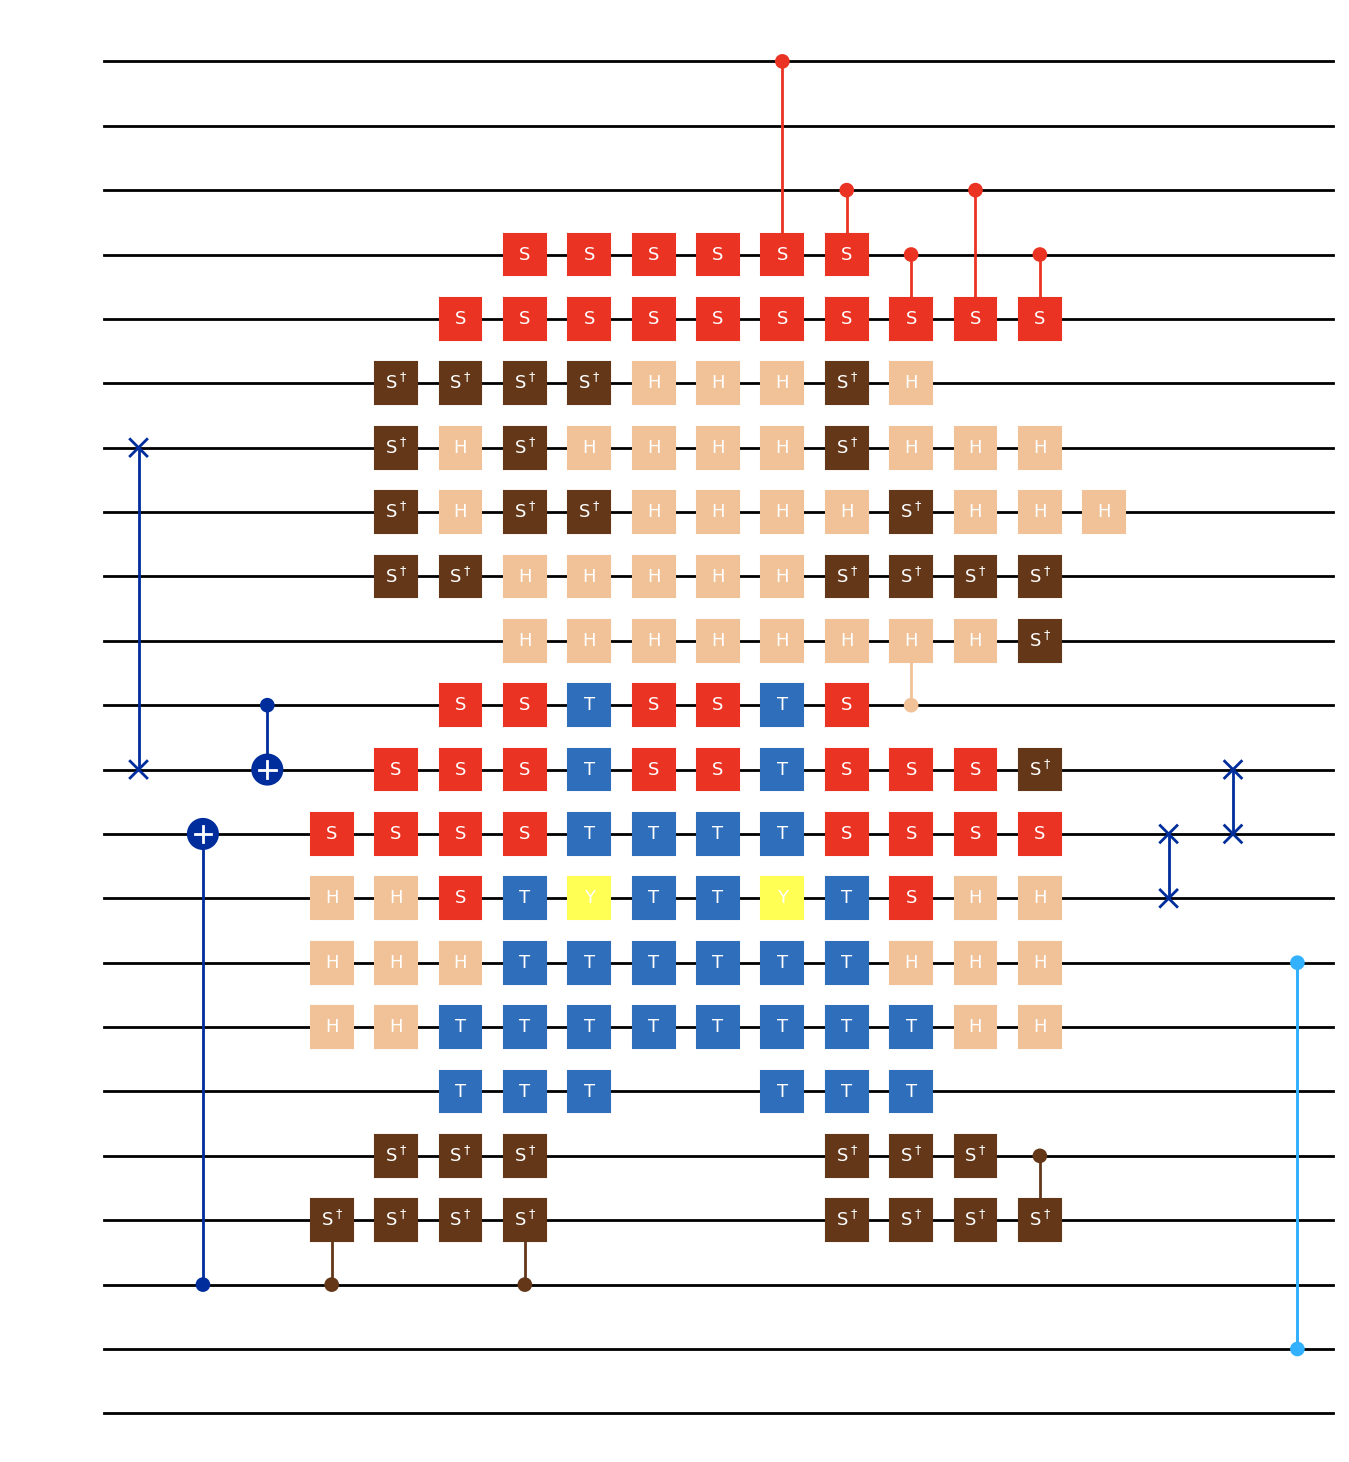

In [2]:
# Run the algorithm
qc = create_qc_from_pixels(
    pixels,
    control_probability=0.3,
    seed=314159265,
    gates=gates,
    control_gates=control_gates,
    color_mode="paint",
    gate_dict=gate_dict,
    zero=image.getpixel((0, 0)),
)

# Draw the circuit
qc.draw(
    output="mpl",
    style=custom_style_image,
    fold=0,
    plot_barriers=False,
    filename=f"examples/outputs/{image_name}-circuit.png",
)